# Higher-Order Derivatives and Taylor Polynomial Stock

https://en.wikipedia.org/wiki/Taylor%27s_theorem  
https://en.wikipedia.org/wiki/Taylor_series  
https://en.wikipedia.org/wiki/Derivative_test   
https://en.wikipedia.org/wiki/Order_of_approximation   

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

#### Create Higher-Order Derivatives and Taylor Polynomial Function

In [2]:
import sympy as sp

def higher_order_derivative(f, x, n):
    """
    Calculates the nth order derivative of a function f(x) using SymPy.

    Parameters:
        f (sympy.core.expr.Expr): The function to differentiate.
        x (sympy.core.symbol.Symbol): The variable to differentiate with respect to.
        n (int): The order of the derivative.

    Returns:
        sympy.core.expr.Expr: The nth order derivative of f(x).
    """
    return sp.diff(f, x, n)

def taylor_polynomial(f, x, a, n):
    """
    Calculates the nth degree Taylor polynomial of a function f(x) centered at a using SymPy.

    Parameters:
        f (sympy.core.expr.Expr): The function to approximate.
        x (sympy.core.symbol.Symbol): The variable to approximate with respect to.
        a (int or float): The point of expansion.
        n (int): The degree of the Taylor polynomial.

    Returns:
        sympy.core.expr.Expr: The nth degree Taylor polynomial of f(x) centered at a.
    """
    taylor_series = sp.series(f, x, a, n + 1)
    taylor_poly = taylor_series.removeO()

    return taylor_poly

In [3]:
# Example function: f(x) = x^3 + 2x^2 - 4x + 1
x = sp.symbols('x')
f = x**3 + 2*x**2 - 4*x + 1

# Calculate the 2nd order derivative of f(x)
second_derivative = higher_order_derivative(f, x, 2)
print("2nd Order Derivative:", second_derivative)

# Calculate the 4th degree Taylor polynomial of f(x) centered at x = 1
taylor_poly = taylor_polynomial(f, x, 1, 4)
print("4th Degree Taylor Polynomial:", taylor_poly)

2nd Order Derivative: 2*(3*x + 2)
4th Degree Taylor Polynomial: 3*x + (x - 1)**3 + 5*(x - 1)**2 - 3


#### Apply Finance Data to Higher-Order Derivatives and Taylor Polynomial 

In [4]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.831585,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.824471,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.014103,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.481064,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.327000,82271200


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.326321,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.814056,234330000
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.568638,212468400
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.587887,169165600
2018-12-31,39.632500,39.840000,39.119999,39.435001,37.951191,140014000


In [6]:
# Select the 'Adj Close' column for analysis
prices = df['Adj Close'].values

In [7]:
# Calculate the first derivative
first_derivative = np.gradient(prices)

# Calculate the second derivative
second_derivative = np.gradient(first_derivative)

# Calculate the third derivative
third_derivative = np.gradient(second_derivative)

# Calculate the Taylor polynomial of degree 3
taylor_degree_3 = prices[0] + first_derivative[0] * (np.arange(len(prices)) - 0) + (1/2) * second_derivative[0] * (np.arange(len(prices)) - 0)**2 + (1/6) * third_derivative[0] * (np.arange(len(prices)) - 0)**3


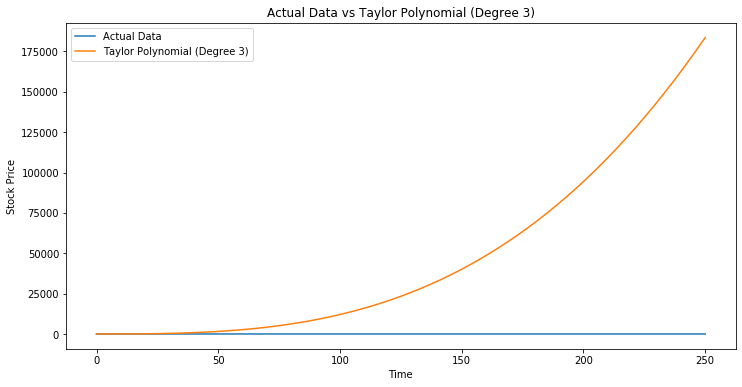

In [8]:
# Plot the actual data and the Taylor polynomial
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Actual Data')
plt.plot(taylor_degree_3, label='Taylor Polynomial (Degree 3)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual Data vs Taylor Polynomial (Degree 3)')
plt.legend()
plt.show()

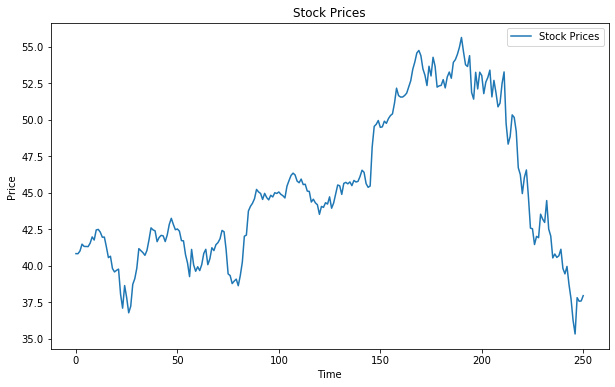

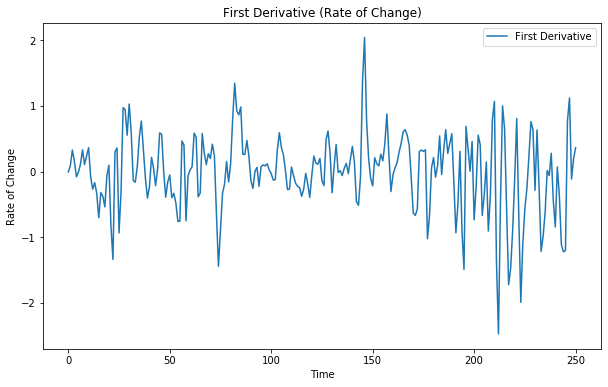

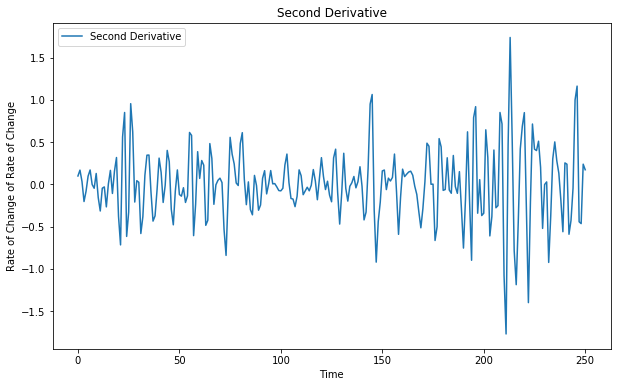

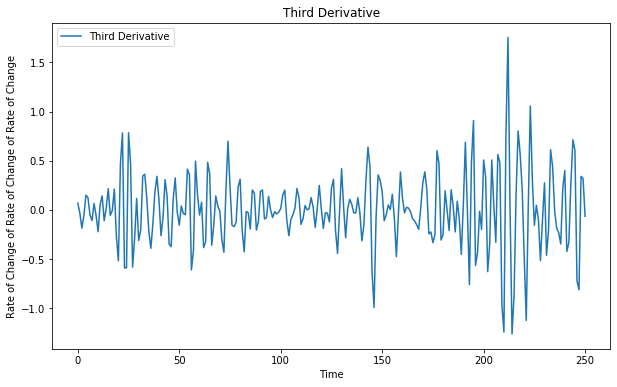

In [9]:
# Plot the stock prices
plt.figure(figsize=(10, 6))
plt.plot(prices, label='Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.show()

# Plot the first derivative
plt.figure(figsize=(10, 6))
plt.plot(first_derivative, label='First Derivative')
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.title('First Derivative (Rate of Change)')
plt.legend()
plt.show()

# Plot the second derivative
plt.figure(figsize=(10, 6))
plt.plot(second_derivative, label='Second Derivative')
plt.xlabel('Time')
plt.ylabel('Rate of Change of Rate of Change')
plt.title('Second Derivative')
plt.legend()
plt.show()

# Plot the third derivative
plt.figure(figsize=(10, 6))
plt.plot(third_derivative, label='Third Derivative')
plt.xlabel('Time')
plt.ylabel('Rate of Change of Rate of Change of Rate of Change')
plt.title('Third Derivative')
plt.legend()
plt.show()